In [1]:
import torch, pandas as pd, os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from DQN.agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
A = "Connect4 DQN model.pt"
#A = "RANDOM5 model.pt"
#A = "RANDOM6 model.pt"
B = "RANDOM X DQN model.pt"

res = head_to_head(
    A, B,
    n_games=1011, #1000, 250, 100, 1911, 1011
    device=device,
    epsilon=0.0,       # no ε during eval
    guard_prob=0.0,    # guard OFF (pure Q)
    opening_noise_k=1, # you can set 1–2 if you want more variety
    seed=666,
    progress=True
)

[load] missing=0, unexpected=0
[load] matched params: 14/14
[load] missing=0, unexpected=0
[load] matched params: 14/14


Connect4 DQN model.pt vs MIXED1 model.pt: 100%|██████████| 1011/1011 [03:21<00:00,  5.01it/s, D=0, L=287, W=724, score=0.716]


In [4]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 287,
 'A_path': 'Connect4 DQN model.pt',
 'A_score_CI95': (0.6883156301301655, 0.743929671551338),
 'A_score_rate': 0.7161226508407518,
 'A_wins': 724,
 'B_path': 'MIXED1 model.pt',
 'draws': 0,
 'games': 1011}

A score = 0.716  (95% CI 0.688–0.744)


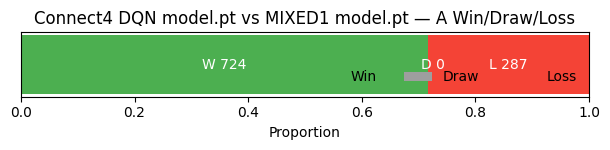

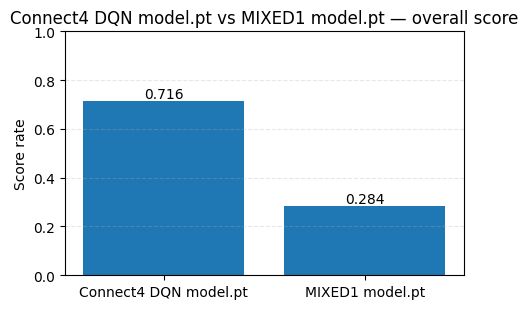

In [5]:
plot_winrate_bar(res)